In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 6000

In [3]:
def model():
    numpyro.sample('x', dist.MultivariateNormal(loc=np.array([5., 10.]), covariance_matrix=[[3., 5.], 
                                                                                            [5., 10.]]))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([-10., 30.])}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(mode='vector'), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

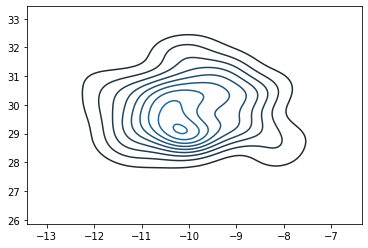

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 3.6013: 100%|██████████| 6000/6000 [00:37<00:00, 160.74it/s]


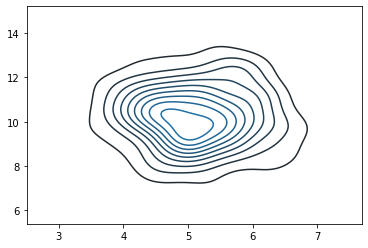

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([[ 5.668193 ,  9.7274   ],
             [ 5.109703 ,  8.24882  ],
             [ 5.1752267,  9.85488  ],
             [ 4.6733313,  8.675351 ],
             [ 5.5262194,  8.538219 ],
             [ 5.0873256, 10.055582 ],
             [ 5.2635903, 10.913836 ],
             [ 5.282974 , 10.835531 ],
             [ 5.34124  ,  7.1260495],
             [ 6.7401175,  9.694417 ],
             [ 3.9870443, 10.548841 ],
             [ 4.8942385,  9.441532 ],
             [ 4.910264 , 11.489847 ],
             [ 4.3587275,  9.954    ],
             [ 5.463881 , 10.426115 ],
             [ 3.4575875,  9.665523 ],
             [ 4.9801064,  8.605195 ],
             [ 5.6935234, 12.317738 ],
             [ 5.5051317,  9.905592 ],
             [ 5.1220064,  8.129644 ],
             [ 4.9450207,  9.282331 ],
             [ 4.685568 , 10.7214155],
             [ 6.0222654, 11.079604 ],
             [ 5.6193814, 12.454722 ],
             [ 4.604172 , 11.598954 ],
             [ 4.747798 ,